## Writing my own Sherlock Holmes Story

Since his inception in the brilliantly creative mind of Sir Arthur Conan Doyle, Sherlock Holmes is a character who has truly stood the test of time, having been written about, spoofed, played in shows and movies by multiple actors, each with their own take on him. SInce there hasn't been a new Sherlock Holmes story in a really long time, let us bring the fictional detective to life using Neural Networks, specifically, LSTMs

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
import sys

np.random.seed(30)
%matplotlib inline

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.6.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
fileName="The Hound of The Baskervilles.txt"
rawText=open(fileName,'r',encoding='utf-8').read()
rawText.lower()[:20]

'\ufeffthe hound of the ba'

In [4]:
chars=sorted(list(set(rawText)))
charToInt=dict((c,i) for i,c in enumerate(chars))

In [5]:
n_chars=len(rawText)
n_vocab=len(chars)
print("Total Characters:",n_chars,"\nTotal Vocab:",n_vocab)

Total Characters: 318527 
Total Vocab: 80


In [6]:
charToInt

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '0': 10,
 '1': 11,
 '2': 12,
 '3': 13,
 '4': 14,
 '5': 15,
 '6': 16,
 '7': 17,
 '8': 18,
 '9': 19,
 ':': 20,
 ';': 21,
 '?': 22,
 'A': 23,
 'B': 24,
 'C': 25,
 'D': 26,
 'E': 27,
 'F': 28,
 'G': 29,
 'H': 30,
 'I': 31,
 'J': 32,
 'K': 33,
 'L': 34,
 'M': 35,
 'N': 36,
 'O': 37,
 'P': 38,
 'Q': 39,
 'R': 40,
 'S': 41,
 'T': 42,
 'U': 43,
 'V': 44,
 'W': 45,
 'Y': 46,
 '[': 47,
 ']': 48,
 '_': 49,
 'a': 50,
 'b': 51,
 'c': 52,
 'd': 53,
 'e': 54,
 'f': 55,
 'g': 56,
 'h': 57,
 'i': 58,
 'j': 59,
 'k': 60,
 'l': 61,
 'm': 62,
 'n': 63,
 'o': 64,
 'p': 65,
 'q': 66,
 'r': 67,
 's': 68,
 't': 69,
 'u': 70,
 'v': 71,
 'w': 72,
 'x': 73,
 'y': 74,
 'z': 75,
 'à': 76,
 'é': 77,
 'ê': 78,
 '\ufeff': 79}

In [7]:
seqLength=100
X=[]
y=[]

for i in range(0,n_chars-seqLength):
    inSequence=rawText[i:i+seqLength]
    outSequence=rawText[i+seqLength]
    X.append([charToInt[c] for c in inSequence])
    y.append([charToInt[outSequence]])

n_patterns=len(X)
print("Total Patterns:",n_patterns)

Total Patterns: 318427


In [8]:
X[0],y[0]

([79,
  42,
  57,
  54,
  1,
  30,
  64,
  70,
  63,
  53,
  1,
  64,
  55,
  1,
  69,
  57,
  54,
  1,
  24,
  50,
  68,
  60,
  54,
  67,
  71,
  58,
  61,
  61,
  54,
  68,
  0,
  0,
  51,
  74,
  1,
  41,
  58,
  67,
  1,
  23,
  67,
  69,
  57,
  70,
  67,
  1,
  25,
  64,
  63,
  50,
  63,
  1,
  26,
  64,
  74,
  61,
  54,
  0,
  0,
  1,
  1,
  25,
  37,
  36,
  42,
  27,
  36,
  42,
  41,
  0,
  0,
  1,
  1,
  25,
  57,
  50,
  65,
  69,
  54,
  67,
  1,
  11,
  8,
  8,
  35,
  67,
  9,
  1,
  41,
  57,
  54,
  67,
  61,
  64,
  52,
  60,
  1,
  30,
  64,
  61],
 [62])

In [9]:
# X needs to be reshaped to be [samples, time_steps, features]

X=np.reshape(X,(n_patterns,seqLength,1))
X=X/float(n_vocab)
y=np_utils.to_categorical(y)

In [10]:
X[0],y[0]

(array([[0.9875],
        [0.525 ],
        [0.7125],
        [0.675 ],
        [0.0125],
        [0.375 ],
        [0.8   ],
        [0.875 ],
        [0.7875],
        [0.6625],
        [0.0125],
        [0.8   ],
        [0.6875],
        [0.0125],
        [0.8625],
        [0.7125],
        [0.675 ],
        [0.0125],
        [0.3   ],
        [0.625 ],
        [0.85  ],
        [0.75  ],
        [0.675 ],
        [0.8375],
        [0.8875],
        [0.725 ],
        [0.7625],
        [0.7625],
        [0.675 ],
        [0.85  ],
        [0.    ],
        [0.    ],
        [0.6375],
        [0.925 ],
        [0.0125],
        [0.5125],
        [0.725 ],
        [0.8375],
        [0.0125],
        [0.2875],
        [0.8375],
        [0.8625],
        [0.7125],
        [0.875 ],
        [0.8375],
        [0.0125],
        [0.3125],
        [0.8   ],
        [0.7875],
        [0.625 ],
        [0.7875],
        [0.0125],
        [0.325 ],
        [0.8   ],
        [0.925 ],
        [0

In [11]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [12]:
filepath = "./models/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint= ModelCheckpoint(
    filepath, 
    monitor="val_loss",
    verbose=2,
    save_best_only=True,
    mode="min")

callbacksList=[checkpoint]

In [13]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [14]:
# model=tf.keras.models.load_model("./models/weights-improvement-20-2.1267.hdf5")

In [15]:
X_train,y_train=X[:250000],y[:250000]
X_val,y_val=X[250000:],y[250000:]

In [16]:
history=model.fit(X_train,y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val),callbacks=callbacksList)

Epoch 1/30
1954/1954 [==============================] - 34s 15ms/step - loss: 2.9623 - accuracy: 0.1909 - val_loss: 2.8082 - val_accuracy: 0.2203

Epoch 00001: val_loss improved from inf to 2.80816, saving model to ./models\weights-improvement-01-2.9623.hdf5
Epoch 2/30
1954/1954 [==============================] - 29s 15ms/step - loss: 2.7911 - accuracy: 0.2194 - val_loss: 2.7320 - val_accuracy: 0.2298

Epoch 00002: val_loss improved from 2.80816 to 2.73201, saving model to ./models\weights-improvement-02-2.7911.hdf5
Epoch 3/30
1954/1954 [==============================] - 29s 15ms/step - loss: 2.7188 - accuracy: 0.2352 - val_loss: 2.6780 - val_accuracy: 0.2437

Epoch 00003: val_loss improved from 2.73201 to 2.67805, saving model to ./models\weights-improvement-03-2.7188.hdf5
Epoch 4/30
1954/1954 [==============================] - 29s 15ms/step - loss: 2.6656 - accuracy: 0.2482 - val_loss: 2.6371 - val_accuracy: 0.2520

Epoch 00004: val_loss improved from 2.67805 to 2.63714, saving model

The network has already been trained for 40 epochs before this point of time, hence the remark that val_loss doesn't improve.

Text(0, 0.5, 'Loss')

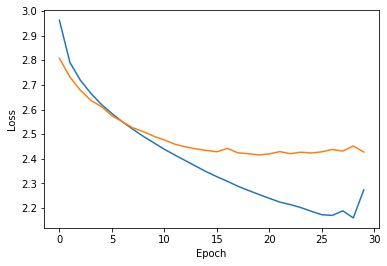

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')


Text(0, 0.5, 'Accuracy')

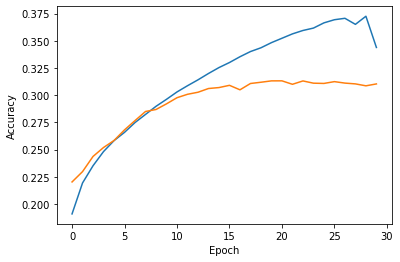

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [68]:
np.random.seed(30)
start =np.random.randint(0,len(X_train)-1)
intToChar=dict((i,c) for i,c in enumerate(chars))
pattern=list(X_train[start])
print("Seed:")
print("/","".join([intToChar[int(value*n_vocab)] for value in pattern]))
for i in range(1000):
    x=np.reshape(pattern,(1,len(pattern),1))
    prediction=model.predict(x,verbose=0)
    index=np.argmax(prediction)
    result=intToChar[index]
    pattern.append([index/n_vocab])
    print(result,end="")

Seed:
/ ing, sir." His agitation was so great that he could hardly
speak, and the shadows sprang up and down
 the sooe of the moor. Tee was aedin and see oateet  and the madd of the mant oa the mant of the moor. Tee was an the manter of the moor, and the hare was she aarente and see ane thet th had been and mested an the mant. 
"I whs  sir," 
"Yol moot that the was a ceatiet of the moor  and I have neter that he was a serini of the moor  and the hart was aelin the mast oe the moor  and the hart was soanenn and tee aarente and see hert aadk and aelir and aeanns  and the mas who was aor  and the wordd sae hool the sooe of the moor  and the hart oa the carene which had been to the moor. Tee was aedin and see oateet  and the madd of the mant oa the mant of the moor. Tee was an the manter of the moor, and the hare was she aarente and see ane thet th had been and mested an the mant. 
"I whs  sir," 
"Yol moot that the was a ceatiet of the moor  and I have neter that he was a serini of the moo